In [1]:
!pip install tensorflow keras numpy mnist matplotlib

In [2]:
import numpy as np
import mnist 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [5]:
model = Sequential()
model.add( Dense(64, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='softmax'))

In [6]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5,
    batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3639 - accuracy: 0.8886
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1867 - accuracy: 0.9436
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1409 - accuracy: 0.9567
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1188 - accuracy: 0.9630
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1047 - accuracy: 0.9673


In [8]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 24us/step


[0.16188050685999916, 0.9506999850273132]

In [13]:
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis = 1))
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]


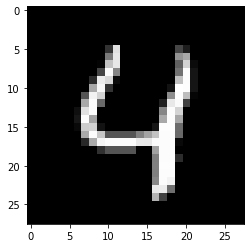

In [10]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show